<a href="https://colab.research.google.com/github/gimin2753/hello-github/blob/main/Term_Project_231013_ma20.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [16]:
!pip install pandas-datareader --q
!pip install yfinance --q
!pip install hmmlearn --q

In [17]:
import datetime
from pandas_datareader import data as pdr
import yfinance as yf
import matplotlib.pyplot as plt
import numpy as np

In [18]:
# 날짜 설정
start = datetime.datetime(2017, 1, 1)
end = datetime.datetime(2023, 1, 1)

# Yahoo Finance Overriding
yf.pdr_override()

In [19]:

# 학습 타겟 설정

target = 'BTC-USD'

[*********************100%%**********************]  2 of 2 completed


<Axes: title={'center': 'Stock prices of the considered asset'}, xlabel='Date'>

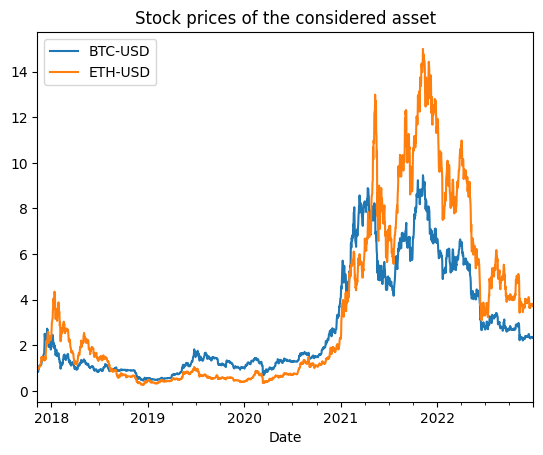

In [20]:
# 위험자산 설정
RISKY_ASSETS = ['BTC-USD', 'ETH-USD']

# Yahoo Finance에서 데이터를 수집함 (기간: start ~ end)
df = pdr.get_data_yahoo(RISKY_ASSETS, start, end)
df.columns.set_levels(['adj_close', 'close', 'high', 'low', 'open', 'volume'],level=0,inplace=True)
df = df.dropna()

# 수정종가 # 스케일링
df_adj = df['adj_close']/df.adj_close.iloc[0]

# 그래프 그리기
df_adj.plot(title='Stock prices of the considered asset')

In [21]:
df

adj_close                      close               \
                 BTC-USD      ETH-USD       BTC-USD      ETH-USD   
Date                                                               
2017-11-09   7143.580078   320.884003   7143.580078   320.884003   
2017-11-10   6618.140137   299.252991   6618.140137   299.252991   
2017-11-11   6357.600098   314.681000   6357.600098   314.681000   
2017-11-12   5950.069824   307.907990   5950.069824   307.907990   
2017-11-13   6559.490234   316.716003   6559.490234   316.716003   
...                  ...          ...           ...          ...   
2022-12-27  16717.173828  1212.791626  16717.173828  1212.791626   
2022-12-28  16552.572266  1189.986084  16552.572266  1189.986084   
2022-12-29  16642.341797  1201.595337  16642.341797  1201.595337   
2022-12-30  16602.585938  1199.232788  16602.585938  1199.232788   
2022-12-31  16547.496094  1196.771240  16547.496094  1196.771240   

                    high                        low               \
                 BTC-USD      ETH-USD       BTC-USD      ETH-USD   
Date                                                               
2017-11-09   7446.830078   329.451996   7101.520020   307.056000   
2017-11-10   7312.000000   324.717987   6436.870117   294.541992   
2017-11-11   6873.149902   319.453003   6204.220215   298.191986   
2017-11-12   6625.049805   319.153015   5519.009766   298.513000   
2017-11-13   6811.189941   328.415009   5844.290039   307.024994   
...                  ...          ...           ...          ...   
2022-12-27  16959.845703  1230.418091  16642.072266  1205.895630   
2022-12-28  16768.169922  1213.128906  16497.556641  1185.702148   
2022-12-29  16651.755859  1204.141602  16508.683594  1188.360229   
2022-12-30  16643.427734  1202.034668  16408.474609  1187.462524   
2022-12-31  16628.986328  1205.088623  16517.519531  1194.203735   

                    open                    volume                
                 BTC-USD      ETH-USD      BTC-USD       ETH-USD  
Date                                                              
2017-11-09   7446.830078   308.644989   3226249984  8.932500e+08  
2017-11-10   7173.729980   320.670990   5208249856  8.859860e+08  
2017-11-11   6618.609863   298.585999   4908680192  8.423010e+08  
2017-11-12   6295.450195   314.690002   8957349888  1.613480e+09  
2017-11-13   5938.250000   307.024994   6263249920  1.041890e+09  
...                  ...          ...          ...           ...  
2022-12-27  16919.291016  1226.987061  15748580239  4.091531e+09  
2022-12-28  16716.400391  1212.736572  17005713920  4.991670e+09  
2022-12-29  16552.322266  1190.010132  14472237479  4.132234e+09  
2022-12-30  16641.330078  1201.569580  15929162910  4.055668e+09  
2022-12-31  16603.673828  1199.360107  11239186456  3.018513e+09  

[1879 rows x 12 columns]

In [22]:
import numpy as np
import pandas as pd
from hmmlearn.hmm import GaussianHMM
import plotly.graph_objects as go
from plotly.graph_objs.scatter.marker import Line
from plotly.subplots import make_subplots
import plotly.express as px
from sklearn.cluster import AgglomerativeClustering
from sklearn.mixture import GaussianMixture
import math

import warnings

warnings.filterwarnings('ignore')

In [23]:
def prepare_input_data(prices, rolling_num):
    # 종목명
    ticker = prices.columns[0]
    # Moving Average, Log Return, MA Difference 계산
    prices[f'{ticker}_ma{rolling_num}'] = np.log(prices).rolling(rolling_num).mean()
    prices[f'{ticker}_log_return'] = np.log(prices[f'{ticker}_ma{rolling_num}']/prices[f'{ticker}_ma{rolling_num}'].shift(1)).dropna()
    prices[f'{ticker}_ma_diff'] = prices.iloc[:, 0].rolling(rolling_num).mean() - prices.iloc[:, 0].rolling(rolling_num+10).mean()
    # print(prices)

    prices.dropna(inplace = True)
    prices_array = np.array([[q] for q in prices[f'{ticker}_ma_diff'].values])

    return prices, prices_array

In [24]:
prices, prices_array = prepare_input_data(df['adj_close'].iloc[:, 0].to_frame(), 20)

prices

,BTC-USD,BTC-USD_ma20,BTC-USD_log_return,BTC-USD_ma_diff
Date,,,,
2017-12-08,16569.400391,9.243351,0.004091,1213.018791
2017-12-09,15178.200195,9.275145,0.003434,1302.283618
2017-12-10,15455.400391,9.306832,0.003411,1370.446313
2017-12-11,16936.800781,9.343891,0.003974,1461.083341
2017-12-12,17415.400391,9.381227,0.003988,1536.998185
...,...,...,...,...
2022-12-27,16717.173828,9.741022,-0.000040,40.170280
2022-12-28,16552.572266,9.739006,-0.000207,-5.049837
2022-12-29,16642.341797,9.737553,-0.000149,-36.169010


In [25]:
prices_array

array([[1213.01879069],
       [1302.28361816],
       [1370.44631348],
       ...,
       [ -36.16901042],
       [ -43.60992839],
       [ -57.45690104]])

In [26]:
class RegimeDetection:

    def get_regimes_hmm(self, input_data, params):
        hmm_model = self.initialise_model(GaussianHMM(), params).fit(input_data)
        return hmm_model

    def get_regimes_clustering(self, params):
        clustering =  self.initialise_model(AgglomerativeClustering(), params)
        return clustering

    def get_regimes_gmm(self, input_data, params):
        gmm = self.initialise_model(GaussianMixture(), params).fit(input_data)
        return gmm

    def initialise_model(self, model, params):
        for parameter, value in params.items():
            setattr(model, parameter, value)
        return model

In [27]:
def plot_hidden_states(hidden_states, prices_df):

    '''
    Input:
    hidden_states(numpy.ndarray) - array of predicted hidden states
    prices_df(df) - dataframe of close prices

    Output:
    Graph showing hidden states and prices

    '''

    colors = ['blue', 'green']
    n_components = len(np.unique(hidden_states))
    fig = go.Figure()

    for i in range(n_components):
        mask = hidden_states == i
        print('Number of observations for State ', i,":", len(prices_df.index[mask]))

        fig.add_trace(go.Scatter(x=prices_df.index[mask], y=prices_df[f"{prices_df.columns[0]}"][mask],
                    mode='markers',  name='Hidden State ' + str(i), marker=dict(size=4,color=colors[i])))

    fig.update_layout(height=400, width=900, legend=dict(
            yanchor="top", y=0.99, xanchor="left",x=0.01), margin=dict(l=20, r=20, t=20, b=20)).show()

In [28]:
regime_detection = RegimeDetection()

In [29]:
print(len(prices))

1850


In [30]:
params = {'n_clusters': 2, 'linkage': 'complete',  'metric': 'manhattan', 'metric': 'manhattan', 'random_state':100}
clustering = regime_detection.get_regimes_clustering(params)
clustering_states = clustering.fit_predict(prices_array)

plot_hidden_states(np.array(clustering_states), prices[[f'{target}']])

Number of observations for State  0 : 1744
Number of observations for State  1 : 106


In [31]:
params = {'n_components':2, 'covariance_type': 'full', 'max_iter': 100000, 'n_init': 30,'init_params': 'kmeans', 'random_state':100}

gmm_model = regime_detection.get_regimes_gmm(prices_array, params)
gmm_states = gmm_model.predict(prices_array)
plot_hidden_states(np.array(gmm_states), prices[[f'{target}']])

Number of observations for State  0 : 470
Number of observations for State  1 : 1380


In [32]:
params = {'n_components':2, 'covariance_type':"full", 'random_state':100}

hmm_model = regime_detection.get_regimes_hmm(prices_array, params)
hmm_states = hmm_model.predict(prices_array)
plot_hidden_states(np.array(hmm_states), prices[[f'{target}']])

Number of observations for State  0 : 575
Number of observations for State  1 : 1275


# Random Forest

In [33]:
# Data Processing
import pandas as pd
import numpy as np

# Modelling
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, ConfusionMatrixDisplay
from sklearn.model_selection import RandomizedSearchCV, train_test_split
from scipy.stats import randint

# Tree Visualisation
from sklearn.tree import export_graphviz
from IPython.display import Image
import graphviz

In [36]:
label = pd.read_csv('BTC-USD.csv', encoding='cp949')

In [37]:
label.Date

0       2017-11-29
1       2017-11-30
2       2017-12-01
3       2017-12-02
4       2017-12-03
           ...    
1854    2022-12-27
1855    2022-12-28
1856    2022-12-29
1857    2022-12-30
1858    2022-12-31
Name: Date, Length: 1859, dtype: object

In [38]:
from datetime import datetime

label['Date'] = pd.to_datetime(label['Date'])

label[label['Date'] >= datetime(2017, 12 ,8)]['Label']

9       1
10      1
11      1
12      1
13      1
       ..
1854    0
1855    0
1856    0
1857    0
1858    0
Name: Label, Length: 1850, dtype: int64

In [39]:
prices['Label'] = list(label[label['Date'] >= datetime(2017, 12, 8)]['Label'])

In [40]:
prices

,BTC-USD,BTC-USD_ma20,BTC-USD_log_return,BTC-USD_ma_diff,Label
Date,,,,,
2017-12-08,16569.400391,9.243351,0.004091,1213.018791,1
2017-12-09,15178.200195,9.275145,0.003434,1302.283618,1
2017-12-10,15455.400391,9.306832,0.003411,1370.446313,1
2017-12-11,16936.800781,9.343891,0.003974,1461.083341,1
2017-12-12,17415.400391,9.381227,0.003988,1536.998185,1
...,...,...,...,...,...
2022-12-27,16717.173828,9.741022,-0.000040,40.170280,0
2022-12-28,16552.572266,9.739006,-0.000207,-5.049837,0
2022-12-29,16642.341797,9.737553,-0.000149,-36.169010,0


In [41]:
# Split the data into features (X) and target (y)
X = prices.drop('Label', axis=1)
y = prices['Label']

# Split the data into training and test sets


# Non - Shuffle
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, shuffle=False)

In [42]:
rf = RandomForestClassifier()
rf.fit(X_train, y_train)

RandomForestClassifier()

In [43]:
y_pred = rf.predict(X_test)

In [44]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.6738738738738739


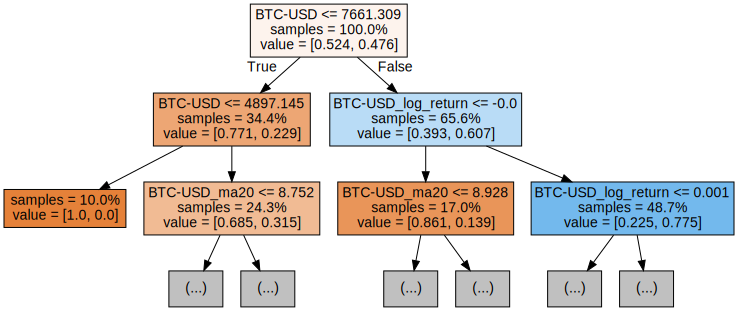

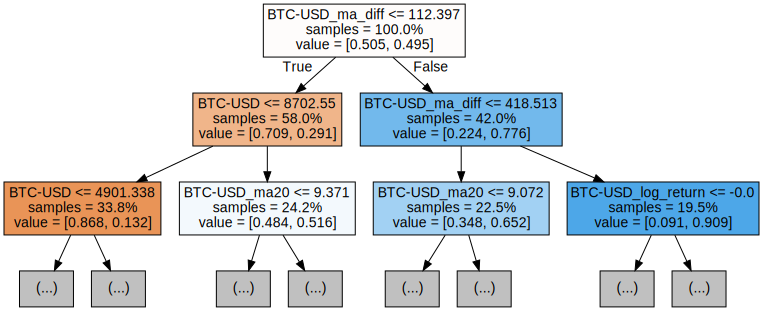

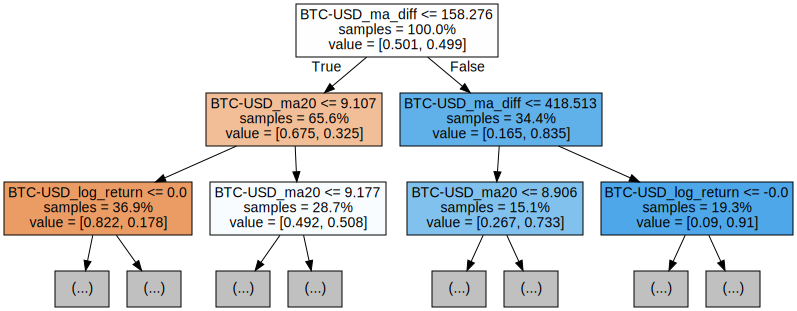

In [45]:
for i in range(3):
    tree = rf.estimators_[i]
    dot_data = export_graphviz(tree,
                               feature_names=X_train.columns,
                               filled=True,
                               max_depth=2,
                               impurity=False,
                               proportion=True)
    graph = graphviz.Source(dot_data)
    display(graph)

In [46]:
y_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [47]:
all_pred = rf.predict(X)

plot_hidden_states(np.array(all_pred), prices[[f'{target}']])

Number of observations for State  0 : 971
Number of observations for State  1 : 879


In [48]:
# 라이브러리
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
import os
from sklearn.tree import export_graphviz
from graphviz import Source
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

%matplotlib inline

(array([0, 1, 2, 3]),
 [Text(0, 0, 'BTC-USD'),
  Text(1, 0, 'BTC-USD_ma20'),
  Text(2, 0, 'BTC-USD_log_return'),
  Text(3, 0, 'BTC-USD_ma_diff')])

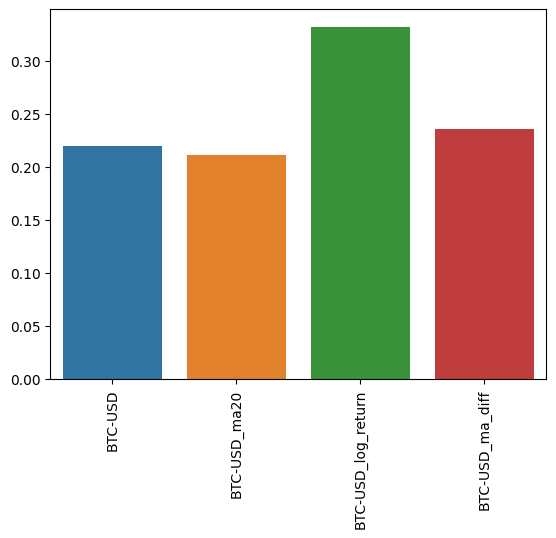

In [49]:
# Features 중요도 시각화
sns.barplot(x = X.columns, y = rf.feature_importances_)
plt.xticks(rotation = 90)

In [50]:
# Shuffle
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, shuffle=True)

rf = RandomForestClassifier()
rf.fit(X_train, y_train)

y_pred = rf.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

all_pred = rf.predict(X)

plot_hidden_states(np.array(all_pred), prices[[f'{target}']])

Accuracy: 0.9459459459459459
Number of observations for State  0 : 1100
Number of observations for State  1 : 750


# LSTM